# EGGS Data from Fields_NoDups.shp

In [1]:
import os 
import fiona
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import geometry
import matplotlib.pyplot as plt

## Import data and explore it

### Fields_NoDups.shp

In [2]:
# Create filepath for shapefile
fields_fp = "C:\\Users\\ashle\\Desktop\\KGS\\data\\Agriculture-Land\\Property Lines"
os.chdir(fields_fp)
fields = gpd.read_file('Fields_NoDups.shp')

In [3]:
fields.head()

,UID,area,geometry
0,177799.0,600292.444252,"POLYGON ((-414437.581 1819101.031, -414495.592..."
1,177806.0,47681.447907,"POLYGON ((-414094.454 1817341.976, -414023.919..."
2,178579.0,44817.218856,"POLYGON ((-405136.460 1804623.246, -405122.688..."
3,179074.0,183642.829332,"POLYGON ((-404758.497 1804520.558, -404758.498..."
4,179231.0,289230.698637,"POLYGON ((-412878.364 1818198.737, -412915.779..."


In [4]:
fields.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   UID       11314 non-null  float64 
 1   area      11314 non-null  float64 
 2   geometry  11314 non-null  geometry
dtypes: float64(2), geometry(1)
memory usage: 265.3 KB


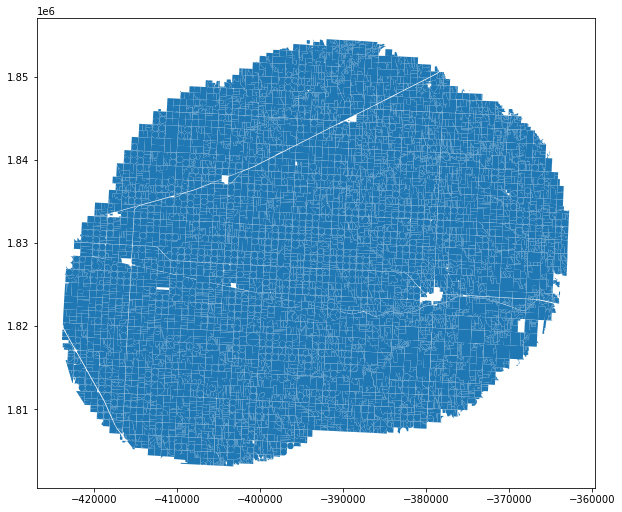

In [5]:
fig, ax = plt.subplots(figsize = (10,10))
fields.plot(ax=ax)
plt.show()

### OpenET Ensemble Data (monthly by field)

In [6]:
# Create a filepath for OpenET data and change working directory
openET_fp = "C:\\Users\\ashle\\Desktop\\KGS\\data\\Hydrometeorology\\OpenET\\"
os.chdir(openET_fp)

In [7]:
# Import ensemble file from OpenET
ensemble = pd.read_csv('ET_monthly_ensemble_FieldsNoDups.csv')
ensemble.head()

,UID,time,et_min,et_max,et_mean,et_median,et_sum,acres
0,177799.0,2016-01-01,7.0,25.0,16.871,17.0,14560.380,148.138
1,177799.0,2016-02-01,24.0,58.0,42.248,42.0,36462.247,148.138
2,177799.0,2016-03-01,29.0,74.0,42.237,42.0,36452.722,148.138
3,177799.0,2016-04-01,39.0,99.0,59.371,60.0,51240.227,148.138
4,177799.0,2016-05-01,74.0,137.0,86.737,83.0,74857.737,148.138


In [8]:
ensemble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814608 entries, 0 to 814607
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   UID        814608 non-null  float64
 1   time       814608 non-null  object 
 2   et_min     814608 non-null  float64
 3   et_max     814608 non-null  float64
 4   et_mean    814608 non-null  float64
 5   et_median  814608 non-null  float64
 6   et_sum     814608 non-null  float64
 7   acres      814608 non-null  float64
dtypes: float64(7), object(1)
memory usage: 49.7+ MB


In [9]:
merge_ensemble = fields.merge(ensemble, on='UID', how='left')
ensemble_fields = gpd.GeoDataFrame(merge_ensemble)

In [10]:
# ensemble_fields.info()

In [32]:
ensemble_fields.head()

,UID,area,geometry,time,et_min,et_max,et_mean,et_median,et_sum,acres
0,177799.0,600292.444252,"POLYGON ((-414437.581 1819101.031, -414495.592...",2016-01-01,7.0,25.0,16.871,17.0,14560.380,148.138
1,177799.0,600292.444252,"POLYGON ((-414437.581 1819101.031, -414495.592...",2016-02-01,24.0,58.0,42.248,42.0,36462.247,148.138
2,177799.0,600292.444252,"POLYGON ((-414437.581 1819101.031, -414495.592...",2016-03-01,29.0,74.0,42.237,42.0,36452.722,148.138
3,177799.0,600292.444252,"POLYGON ((-414437.581 1819101.031, -414495.592...",2016-04-01,39.0,99.0,59.371,60.0,51240.227,148.138
4,177799.0,600292.444252,"POLYGON ((-414437.581 1819101.031, -414495.592...",2016-05-01,74.0,137.0,86.737,83.0,74857.737,148.138


In [12]:
# et = ['et_min', 'et_max', 'et_mean', 'et_median']

In [13]:
# # Create figure and axes (this time it's 9, arranged 3 by 3)
# f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# # Make the axes accessible with single indexing
# axs = axs.flatten()
# # Start the loop over all the variables of interest
# for i, col in enumerate(et):
#     select the axis where the map will go
#     ax = axs[i]
#     # Plot the map
#     ensemble_fields.plot(column=col, ax=ax, scheme='Quantiles', linewidth=0, cmap='Blues')
#     # Remove axis clutter
#     ax.set_axis_off()
#     # Set the axis title to the name of variable being plotted
#     ax.set_title(col)
# # Display the figure
# plt.show()

### gridMET Data (monthly)

In [14]:
# Create gridMET filepath
gridmet_fp = "C:\\Users\\ashle\\Desktop\\KGS\\data\\Hydrometeorology\\gridMET\\"
os.chdir(gridmet_fp)

In [15]:
gridmet = pd.read_csv('DailyMet_FieldsNoDups_2016-2021_20220605.csv')
gridmet.head()

,UID,date_ymd,pr,eto,etr
0,377763.0,20160101,0.0,1.64,2.68
1,377771.0,20160101,0.0,1.63,2.67
2,377783.0,20160101,0.0,1.64,2.68
3,377787.0,20160101,0.0,1.62,2.64
4,377788.0,20160101,0.0,1.63,2.66


In [16]:
gridmet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15707872 entries, 0 to 15707871
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   UID       float64
 1   date_ymd  int64  
 2   pr        float64
 3   eto       float64
 4   etr       float64
dtypes: float64(4), int64(1)
memory usage: 599.2 MB


### Irrigation Status (%, yearly)

In [71]:
# Create irrigation status filepath
aim_fp = "C:\\Users\\ashle\\Desktop\\KGS\\data\\Agriculture-Land\\Irrigation Status"
os.chdir(aim_fp)

In [73]:
aim = pd.read_csv('Fields_Attributes-Irrigation-AnnualAIM.csv')
aim = aim[aim['Year'] > 2015]
aim.head()

,UID,Year,IrrigatedPrc
362048,377763,2016,0.007
362049,377770,2016,0.003
362050,377771,2016,0.955
362051,377772,2016,0.000
362052,377781,2016,0.051


In [19]:
aim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56570 entries, 362048 to 418617
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UID           56570 non-null  int64  
 1   Year          56570 non-null  int64  
 2   IrrigatedPrc  56570 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.7 MB


### Annual CDL (yearly)

In [67]:
# Create annual CDL filepath
cdl_fp = "C:\\Users\\ashle\\Desktop\\KGS\\data\\Agriculture-Land\\Land Use-Land Cover"
os.chdir(cdl_fp)

In [68]:
cdl = pd.read_csv('Fields_Attributes-LandCover-AnnualCDL.csv')
cdl = cdl[cdl['Year'] > 2015]
cdl.head()

,UID,Year,CropCode,pctcov
10,177799,2016,1,0.980
11,177799,2017,1,0.992
12,177799,2018,1,0.951
13,177799,2019,1,0.964
14,177799,2020,1,0.972


In [69]:
merge_cdl = fields.merge(cdl, on='UID', how='left')
cdl_fields = gpd.GeoDataFrame(merge_cdl)

In [92]:
cdl_fields.head()

,UID,area,geometry,Year,CropCode,pctcov
0,177799.0,600292.444252,"POLYGON ((-414437.581 1819101.031, -414495.592...",2016,1,0.980
1,177799.0,600292.444252,"POLYGON ((-414437.581 1819101.031, -414495.592...",2017,1,0.992
2,177799.0,600292.444252,"POLYGON ((-414437.581 1819101.031, -414495.592...",2018,1,0.951
3,177799.0,600292.444252,"POLYGON ((-414437.581 1819101.031, -414495.592...",2019,1,0.964
4,177799.0,600292.444252,"POLYGON ((-414437.581 1819101.031, -414495.592...",2020,1,0.972


### Soil Data (by field)

In [23]:
# Create soil data filepath
soil_fp = "C:\\Users\\ashle\\Desktop\\KGS\\data\\Agriculture-Land\\Soils"
os.chdir(soil_fp)

In [24]:
soil = pd.read_csv('Soil_Data_POLARIS_FieldsNoDups.csv', index_col = 0)
soil.head()

,UID,depth_cm,silt_prc,sand_prc,clay_prc,thetaS_m3m3,thetaR_m3m3,logKsat_cmHr,lambda,logHB_kPa,n,logAlpha_kPa1
0,177799,0-5,50.40,27.29,18.87,0.49,0.06,0.07,0.32,0.32,1.36,-0.32
1,177806,0-5,60.61,14.93,20.83,0.49,0.06,0.19,0.29,0.50,1.31,-0.50
2,178579,0-5,56.60,20.11,19.87,0.51,0.05,0.18,0.31,0.34,1.34,-0.34
3,179074,0-5,55.98,19.79,20.52,0.51,0.06,0.12,0.31,0.34,1.33,-0.34
4,179231,0-5,50.56,27.19,18.84,0.49,0.06,0.07,0.32,0.31,1.36,-0.32


In [25]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67884 entries, 0 to 67883
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UID            67884 non-null  int64  
 1   depth_cm       67884 non-null  object 
 2   silt_prc       67884 non-null  float64
 3   sand_prc       67884 non-null  float64
 4   clay_prc       67884 non-null  float64
 5   thetaS_m3m3    67884 non-null  float64
 6   thetaR_m3m3    67884 non-null  float64
 7   logKsat_cmHr   67884 non-null  float64
 8   lambda         67884 non-null  float64
 9   logHB_kPa      67884 non-null  float64
 10  n              67884 non-null  float64
 11  logAlpha_kPa1  67884 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 6.7+ MB


## Playing with data

In [50]:
et_pr = gpd.GeoDataFrame(pd.concat([ensemble_fields['UID'], 
                   ensemble_fields['time'], 
                   ensemble_fields['et_mean'], 
                   gridmet['pr'], 
                   ensemble_fields['geometry']], 
                  axis=1, 
                  keys=['UID', 'time', 'et_mean', 'pr', 'geometry']))
et_pr = et_pr.dropna(axis=0)
et_pr['et_calc'] = et_pr['pr'] - et_pr['et_mean']
et_pr

,UID,time,et_mean,pr,geometry,et_calc
0,177799.0,2016-01-01,16.871,0.0,"POLYGON ((-414437.581 1819101.031, -414495.592...",-16.871
1,177799.0,2016-02-01,42.248,0.0,"POLYGON ((-414437.581 1819101.031, -414495.592...",-42.248
2,177799.0,2016-03-01,42.237,0.0,"POLYGON ((-414437.581 1819101.031, -414495.592...",-42.237
3,177799.0,2016-04-01,59.371,0.0,"POLYGON ((-414437.581 1819101.031, -414495.592...",-59.371
4,177799.0,2016-05-01,86.737,0.0,"POLYGON ((-414437.581 1819101.031, -414495.592...",-86.737
...,...,...,...,...,...,...
814603,1559412.0,2021-08-01,181.548,0.0,"POLYGON ((-395794.257 1849884.306, -395834.930...",-181.548
814604,1559412.0,2021-09-01,106.962,0.0,"POLYGON ((-395794.257 1849884.306, -395834.930...",-106.962
814605,1559412.0,2021-10-01,46.203,0.0,"POLYGON ((-395794.257 1849884.306, -395834.930...",-46.203
814606,1559412.0,2021-11-01,19.485,0.0,"POLYGON ((-395794.257 1849884.306, -395834.930...",-19.485


Text(0.5, 1.0, 'Mean Evapotranspiration for SD-6')

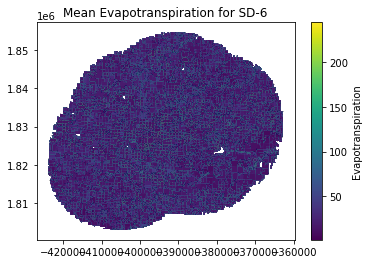

In [94]:
fig, ax = plt.subplots(1,1)
et_pr.plot('et_mean', ax=ax, legend=True,legend_kwds={'label': "Evapotranspiration"},figsize=(12,12))
plt.title('Mean Evapotranspiration for SD-6')

Text(0.5, 1.0, 'Crop Codes for SD-6')

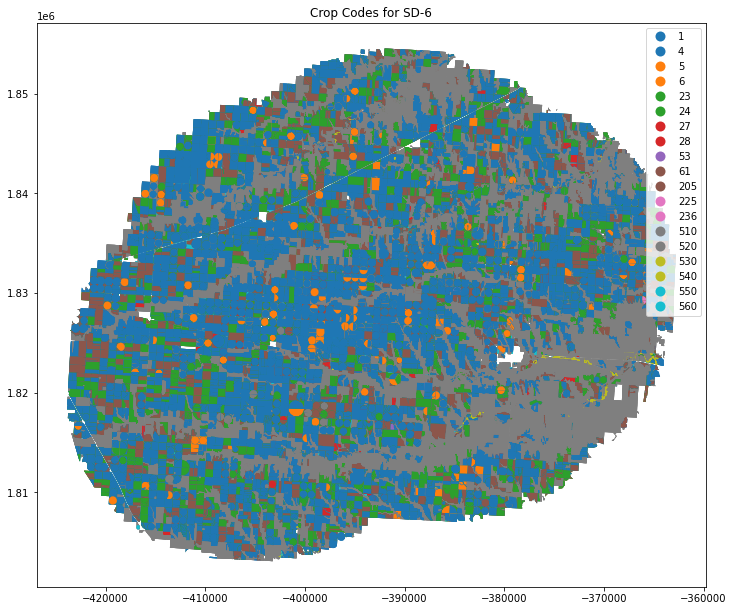

In [85]:
# fig, ax = plt.subplots(1,1)
cdl_fields.plot('CropCode', categorical=True, legend=True, figsize=(12,12))
# et_pr.plot(ax=axes[0][0], column='et_mean', cmap='Blues', legend=True,legend_kwds={'label': "ET"})
plt.title('Crop Codes for SD-6')

Text(0.5, 1.0, 'SD-6')

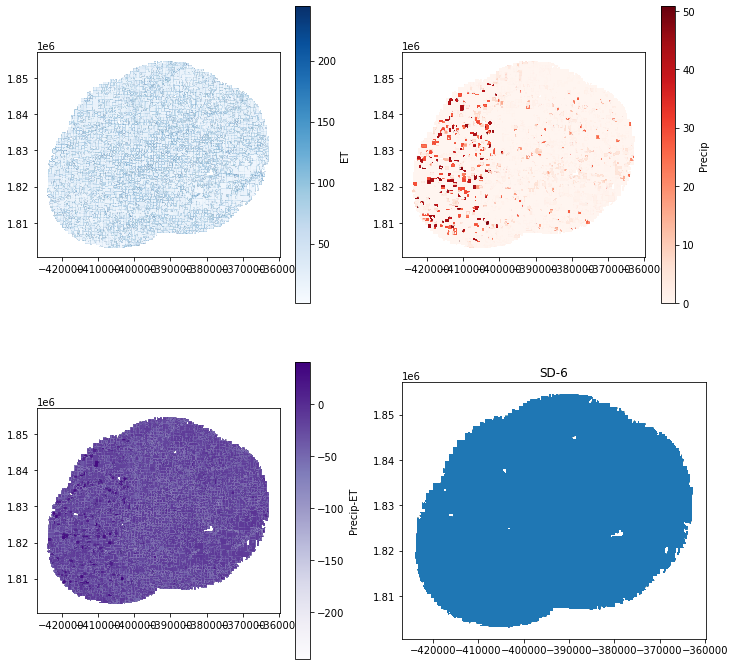

In [52]:
f, axes = plt.subplots(figsize=(12, 12), ncols=2, nrows=2)
et_pr.plot(ax=axes[0][0], column='et_mean', cmap='Blues', legend=True,legend_kwds={'label': "ET"})
plt.title('Mean Evapotranspiration for SD-6')
et_pr.plot(ax=axes[0][1], column='pr', cmap='Reds', legend=True,legend_kwds={'label': "Precip"})
plt.title('Mean Precipitation for SD-6')
et_pr.plot(ax=axes[1][0], column='et_calc', cmap='Purples', legend=True,legend_kwds={'label': "Precip-ET"})
plt.title('Mean Difference in Precip & ET for SD-6')
et_pr.plot(ax=axes[1][1])
plt.title('SD-6')

In [58]:
# g = sns.FacetGrid(et_pr.iloc[0:121], col="UID")
# g.map(sns.lineplot, x = "time", y="et_mean").add_legend()

In [38]:
# graph = ['et_mean', 'pr']

In [59]:
# # Create figure and axes (this time it's 9, arranged 3 by 3)
# f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# # Make the axes accessible with single indexing
# axs = axs.flatten()
# # Start the loop over all the variables of interest
# for i, col in enumerate(graph):
# #     select the axis where the map will go
#     ax = axs[i]
#     # Plot the map
#     ensemble_fields.plot(column=col, ax=ax, scheme='Quantiles', linewidth=0, cmap='Blues')
#     # Remove axis clutter
#     ax.set_axis_off()
#     # Set the axis title to the name of variable being plotted
#     ax.set_title(col)
# # Display the figure
# plt.show()